In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FuncFormatter

sns.set()
sns.set_style("whitegrid")

out_file_path = "../img/"


In [12]:
cu_data = pd.read_csv("spgemm_cu_3080.csv",
                      header=None,
                      names=[
                          "pro", "mat", "x", "y", "compute", "m", "n", "nnz",
                          "cu_time",
                      ])

work_est = pd.read_csv("spgemm_work_est_cbd.csv",
                      header=None,
                      names=[
                          "mat", "flops",
                      ])
                      
all_data = pd.merge(cu_data, work_est, how='inner', on='mat')

all_data["cu_gflops"] = 2 * all_data["flops"] / all_data["cu_time"] / 1e6

print(all_data)
all_data.to_csv("./cusparse.csv", sep=',')


                           pro  \
0       exe_spgemm_cusparse_16   
1       exe_spgemm_cusparse_32   
2       exe_spgemm_cusparse_64   
3     exe_spgemm_cusparse_bf16   
4       exe_spgemm_cusparse_16   
...                        ...   
7776  exe_spgemm_cusparse_bf16   
7777    exe_spgemm_cusparse_16   
7778    exe_spgemm_cusparse_32   
7779    exe_spgemm_cusparse_64   
7780  exe_spgemm_cusparse_bf16   

                                                    mat  x  y  compute      m  \
0                       /ssget/MM/Grund/poli4/poli4.cbd  2  2        2  33833   
1                       /ssget/MM/Grund/poli4/poli4.cbd  4  4        4  33833   
2                       /ssget/MM/Grund/poli4/poli4.cbd  8  8        8  33833   
3                       /ssget/MM/Grund/poli4/poli4.cbd  2  2        2  33833   
4                       /ssget/MM/Grund/b_dyn/b_dyn.cbd  2  2        2   1089   
...                                                 ... .. ..      ...    ...   
7776  /ssget/MM/Mycielsk

In [13]:
pro_info = all_data["pro"].unique()
print(pro_info)

['exe_spgemm_cusparse_16' 'exe_spgemm_cusparse_32'
 'exe_spgemm_cusparse_64' 'exe_spgemm_cusparse_bf16']


In [14]:
for diff_pro in pro_info:
    temp_data = all_data[all_data["pro"].isin([diff_pro])]
    exec("%s=temp_data.copy()" % diff_pro)

for diff_pro in pro_info:
    print(eval(diff_pro))
    print(
        "------------------------------------------------------------------------------------------------------"
    )



                         pro  \
0     exe_spgemm_cusparse_16   
4     exe_spgemm_cusparse_16   
8     exe_spgemm_cusparse_16   
12    exe_spgemm_cusparse_16   
16    exe_spgemm_cusparse_16   
...                      ...   
7761  exe_spgemm_cusparse_16   
7765  exe_spgemm_cusparse_16   
7769  exe_spgemm_cusparse_16   
7773  exe_spgemm_cusparse_16   
7777  exe_spgemm_cusparse_16   

                                                    mat  x  y  compute      m  \
0                       /ssget/MM/Grund/poli4/poli4.cbd  2  2        2  33833   
4                       /ssget/MM/Grund/b_dyn/b_dyn.cbd  2  2        2   1089   
8                         /ssget/MM/Grund/meg4/meg4.cbd  2  2        2   5860   
12                        /ssget/MM/Grund/meg1/meg1.cbd  2  2        2   2904   
16            /ssget/MM/Grund/poli_large/poli_large.cbd  2  2        2  15575   
...                                                 ... .. ..      ...    ...   
7761  /ssget/MM/Mycielski/mycielskian8/mycielski

/home/hemeng/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 2000x1200 with 0 Axes>

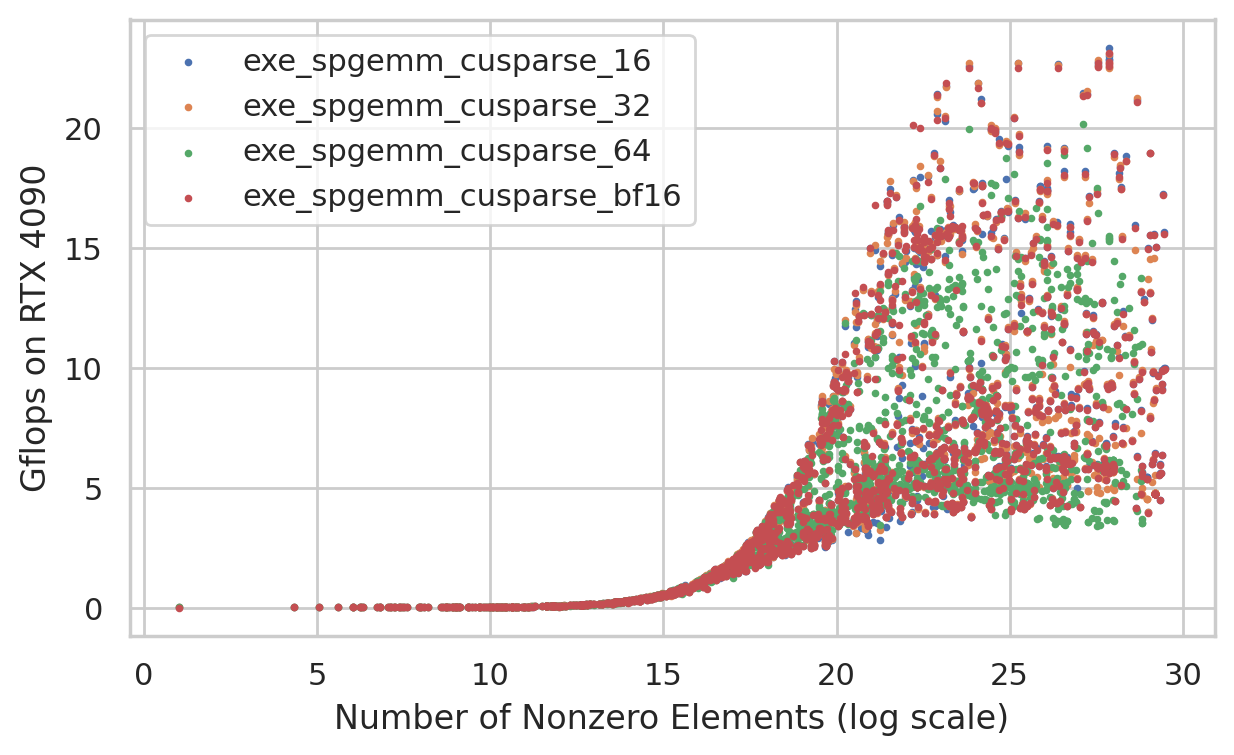

In [15]:
plt.figure(figsize=(10, 6), dpi=200)
plt.figure(figsize=(7, 4), dpi=200)
dot_size = 3
for diff_pro in pro_info:
    single_data = eval(diff_pro)
    plt.scatter(np.log2(single_data["flops"]),
                (single_data["cu_gflops"]),
                # np.log2(single_data["cu_gflops"]),
                label=diff_pro,
                s=dot_size)

plt.legend(loc=0)
# plt.ylim(0, 0.01)
plt.xlabel("Number of Nonzero Elements (log scale)")
plt.ylabel("Gflops on RTX 3080")
plt.show()

In [25]:
data_64=exe_spgemm_cusparse_64[["mat", "cu_gflops", "flops"]]
data_32=exe_spgemm_cusparse_32[["mat", "cu_gflops"]]
data_16=exe_spgemm_cusparse_16[["mat", "cu_gflops"]]
data_bf16=exe_spgemm_cusparse_bf16[["mat", "cu_gflops"]]

data_comp = pd.merge(data_64, data_32, how='inner', on='mat', suffixes=("_64", "_32"))
data_comp = pd.merge(data_comp, data_16, how='inner', on='mat', suffixes=("_32", "_16"))
data_comp = pd.merge(data_comp, data_bf16, how='inner', on='mat', suffixes=("_16", "_bf16"))

# print(data_comp)

data_comp["speedup_bf16"] = data_comp["cu_gflops_bf16"] / data_comp["cu_gflops_64"]
data_comp["speedup_16"] = data_comp["cu_gflops_16"] / data_comp["cu_gflops_64"]
data_comp["speedup_32"] = data_comp["cu_gflops_32"] / data_comp["cu_gflops_64"]

print(data_comp)


                                                    mat  cu_gflops_64  \
0                       /ssget/MM/Grund/poli4/poli4.cbd      1.883450   
1                       /ssget/MM/Grund/b_dyn/b_dyn.cbd      0.216734   
2                         /ssget/MM/Grund/meg4/meg4.cbd      3.449956   
3                         /ssget/MM/Grund/meg1/meg1.cbd      5.220924   
4             /ssget/MM/Grund/poli_large/poli_large.cbd      1.126395   
...                                                 ...           ...   
1906  /ssget/MM/Mycielski/mycielskian8/mycielskian8.cbd      1.777696   
1907  /ssget/MM/Mycielski/mycielskian6/mycielskian6.cbd      0.103001   
1908  /ssget/MM/Mycielski/mycielskian2/mycielskian2.cbd      0.000046   
1909  /ssget/MM/Mycielski/mycielskian12/mycielskian1...      4.762845   
1910  /ssget/MM/Mycielski/mycielskian7/mycielskian7.cbd      0.478678   

          flops  cu_gflops_32  cu_gflops_16  cu_gflops_bf16  
0        175255      1.837151      1.871783        1.918080  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 2000x1200 with 0 Axes>

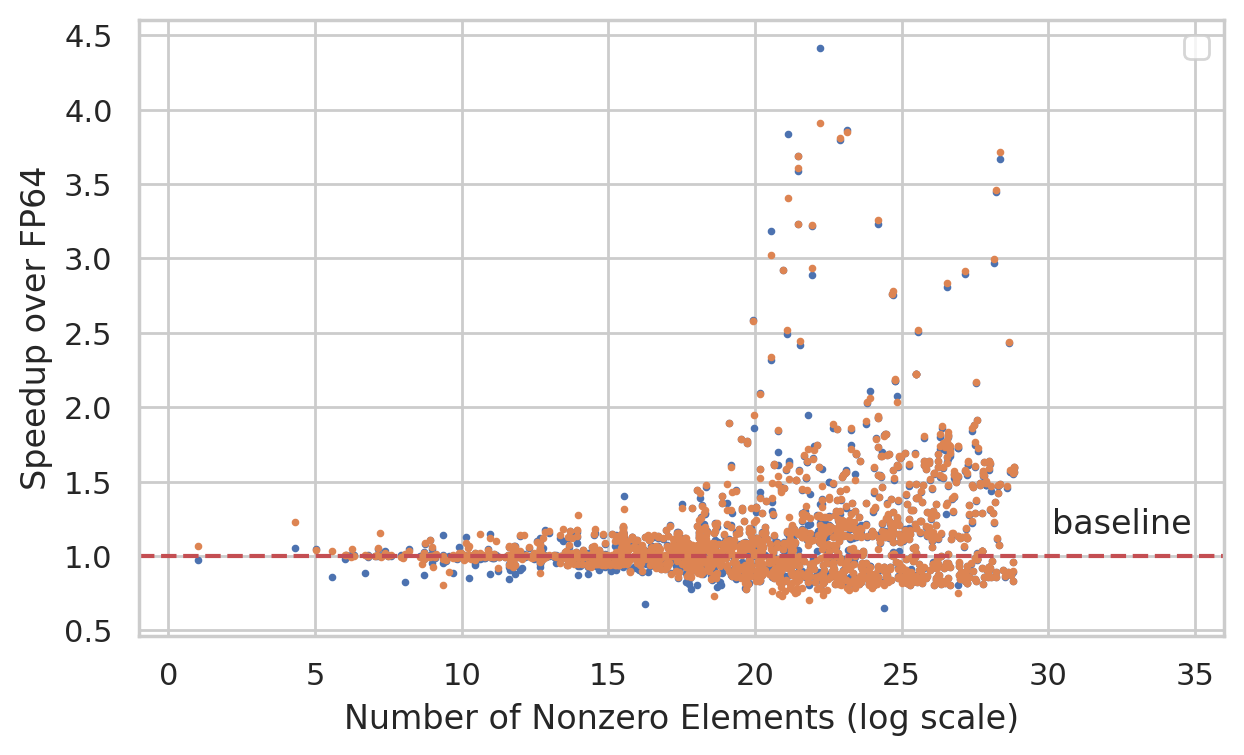

In [27]:

plt.figure(figsize=(10, 6), dpi=200)
plt.figure(figsize=(7, 4), dpi=200)
dot_size = 3

plt.scatter(np.log2(data_comp["flops"]),
            (data_comp["speedup_bf16"]),
            s=dot_size)
plt.scatter(np.log2(data_comp["flops"]),
            (data_comp["speedup_16"]),
            s=dot_size)
# plt.scatter(np.log2(data_comp["flops"]),
#             (data_comp["speedup_32"]),
#             s=dot_size)

text_her_loc = 34.9
text_ver_loc = 0.15
plt.axhline(1, color="r", linestyle="--")
plt.text(text_her_loc, 1 + text_ver_loc, 'baseline', horizontalalignment="right")

plt.xlim(-1, 36)

plt.legend(loc=0)
# plt.ylim(0, 0.01)
plt.xlabel("Number of Nonzero Elements (log scale)")
plt.ylabel("Speedup over FP64")
plt.show()

